# Let's get going!

In this session, we will see how to import signals from the harddrive, how to display signals and how to write signals to the harddrive.

We begin with importing the essentials.

- numpy is for array handling,
- IPython for i/o handling audio, and
- matplotlib to handle figures.

I am also going to modify the formatting of the figures to make them neat!

In [22]:
import numpy as np
import IPython

from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

## Import a Speech File

Let's import a speech file and play the audio.

In [15]:
Fs, s = wavfile.read('speech.wav')
s = s / 32767.0
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

sampling rate: 16000Hz


## Plotting the Signal

Let's display the signal. To make calling these multiple times easier, let's write a function. Further, to be able to save the results, let's add a conditional statement to allow saving the result.

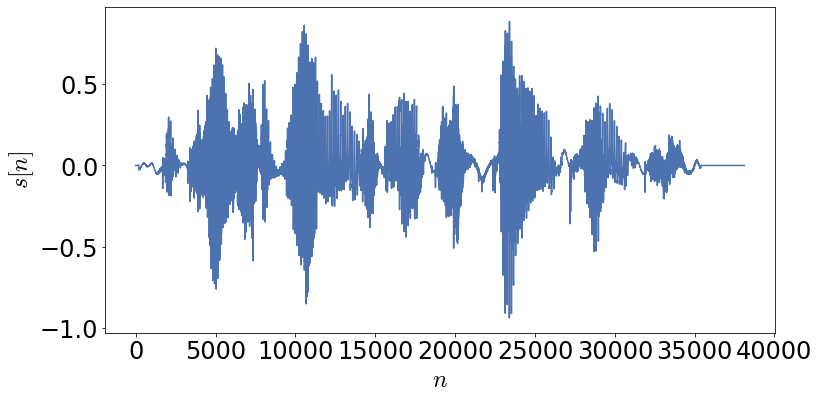

In [21]:
def plot_signal(x, xaxis_label=None, yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
        
    return

plot_signal(s, xaxis_label=r'$n$', yaxis_label=r'$s[n]$', save='input')

## Using Python Functions to Perform Operations

Now, let's write a simple function to multiply two signals. In particular, we will multiply the speech signal $s[n]$ with a cosine signal $\cos(\omega_0 n)$. We will use the ```multiply``` function from numpy.

In [8]:
def multiply_signals(x, omega, Fs):
    w = (float(omega) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

We will use this function on the speech signal.

_What is the expected outcome? Can you guess? Better, can you analytically show the outcome?_

In [9]:
alien_voice = multiply_signals(s, 3000, Fs)
IPython.display.Audio(alien_voice, rate=Fs)

Let's be sure to save the result. Don't want to miss out on hearing aliens again!

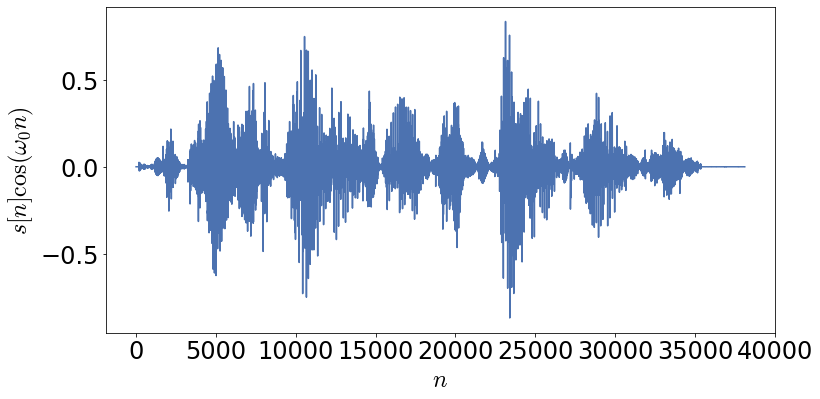

In [10]:
wavfile.write('alien.wav', Fs, alien_voice)
plot_signal(alien_voice, xaxis_label=r'$n$', yaxis_label=r'$s[n]\cos(\omega_0n)$', save='output')

## Wrap Up Comments

- _Can you notice the differences between the signals?_
- _If yes, and explain why the speech signals sound different based on the obervations._
- _If no, comment why you think the speech signals sound different._